# Import libraries

In [2]:
# %load poisson_equation.py
import matplotlib.pyplot as plt
import numpy as np

from fenics import *

# Define the problem & Solution

+ Mesh
+ Function space
+ Boundary condition
+ Varational problem
+ Solution

In [3]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 10)
V = FunctionSpace(mesh, 'P', 3)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)


def boundary(x, on_boundary):
    return on_boundary


bc = DirichletBC(V, u_D, boundary)

# Define Varational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Solution at nodes

In [6]:
#nodal_values_u = u.vector()
#array_u = nodal_values_u.array()
#array_u
#nodal_values_u

# Values at all the vertices of the mesh
vertex_value_u = u.compute_vertex_values(mesh)
print(vertex_value_u)

[ 1.        1.015625  1.0625    1.140625  1.25      1.390625  1.5625
  1.765625  2.        1.02      1.035625  1.0825    1.160625  1.27
  1.410625  1.5825    1.785625  2.02      1.08      1.095625  1.1425
  1.220625  1.33      1.470625  1.6425    1.845625  2.08      1.18
  1.195625  1.2425    1.320625  1.43      1.570625  1.7425    1.945625
  2.18      1.32      1.335625  1.3825    1.460625  1.57      1.710625
  1.8825    2.085625  2.32      1.5       1.515625  1.5625    1.640625
  1.75      1.890625  2.0625    2.265625  2.5       1.72      1.735625
  1.7825    1.860625  1.97      2.110625  2.2825    2.485625  2.72      1.98
  1.995625  2.0425    2.120625  2.23      2.370625  2.5425    2.745625
  2.98      2.28      2.295625  2.3425    2.420625  2.53      2.670625
  2.8425    3.045625  3.28      2.62      2.635625  2.6825    2.760625
  2.87      3.010625  3.1825    3.385625  3.62      3.        3.015625
  3.0625    3.140625  3.25      3.390625  3.5625    3.765625  4.      ]


# Compute Errors

$\text{Error} = \sqrt{\int _ {\Omega} (u_D-u)^2dx }$ 

In [7]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_value_u_D = u_D.compute_vertex_values(mesh)
vertex_value_u = u.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertex_value_u_D - vertex_value_u))

# Print errors
#print('u:', vertex_value_u)
print('Error L2:', error_L2)
print('Error max:', error_max)

Error L2: 3.589918671394497e-13
Error max: 6.45261621912e-13


# Export solution to SVK file

In [8]:
# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Plot solution

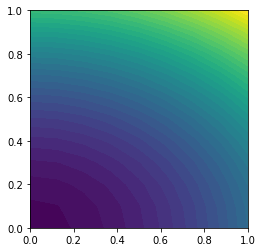

In [9]:
# Plot solution and mesh
%matplotlib inline
plot(u)
plt.show()
#plt.savefig('poissonEq.png')